<a href="https://colab.research.google.com/github/Adwait-Naravane/Projects--comp-phy-/blob/game-of-life/conway's_game_of_life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#numpy for manipulating matrices
#plt for displaying matrix as a grid map. 
#animation for combining all together in an animation


In [ ]:
# We can use any N*N matrix for this, the below commented matrix is the oscillator.
'''
matrix = [
          [0,0,0,0,0],
          [0,0,0,0,0],
          [0,1,1,1,0],
          [0,0,0,0,0],
          [0,0,0,0,0]
]
'''
N = 100
matrix =  np.random.choice([1,0], N*N, p=[0.2, 0.8]).reshape(N, N)

In [ ]:
#for game of life, we will need a neighbour finding function.
#the one below works for all matrix elements even on the boundaries.

def neighbors(matrix, r, c):
    def get(r, c):
        if 0 <= r < len(matrix) and 0 <= c < len(matrix[r]):
            return matrix[r][c]
        else:
            return 0

    neighbors_list = [get(r-1, c-1), get(r-1, c), get(r-1, c+1),
                      get(r  , c-1),              get(r  , c+1),
                      get(r+1, c-1), get(r+1, c), get(r+1, c+1)]

    return sum(map(bool, neighbors_list))

#now a function to apply the rules.
def rules(matrix, i ,j):
  if (matrix[i][j] == 0) and (neighbors(matrix, i, j) == 3):
    return 1
  elif (matrix[i][j] == 1) and ((neighbors(matrix, i,j) == 2) or (neighbors(matrix, i,j) == 3)):
    return 1
  else:
    return 0

#and a function to  update our matrices.
def changer(data):
  global matrix
  a = np.zeros((len(matrix),len(matrix[0])))
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      a[i][j] = a[i][j] + rules(matrix, i, j)
  mat.set_data(a)
  matrix = a
  return [mat]



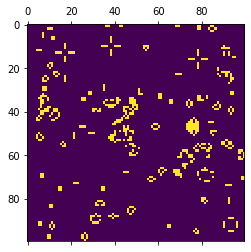

In [ ]:
#now we simply combine the "changer" function with the animation classes

fig, ax = plt.subplots()
mat = ax.matshow(matrix)
ani = animation.FuncAnimation(fig, changer, interval = 50, save_count = 200)
ani.save('game_of_life.mp4')